#### The purpose of this assignment is to get you comfortable thinking in the RGB color space. 

You are free to choose 3 images that look "similar" to you or very different and describe how mapping them into color space (i.e. making histograms of their color distributions like we did for Stitch in class) either confirms or negates these differences or similarities.  (For example, let's say you choose a painting of a beach and a photo of a beach their color spaces might look very different although they are representations of similar objects). You may also want to choose a set of images that you like and those you don't like to see if there are any differences due to color choices.

Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?

## Manipulation of Image: downsampling the color profile of an image


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\12172\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

## Reading the image from folder 

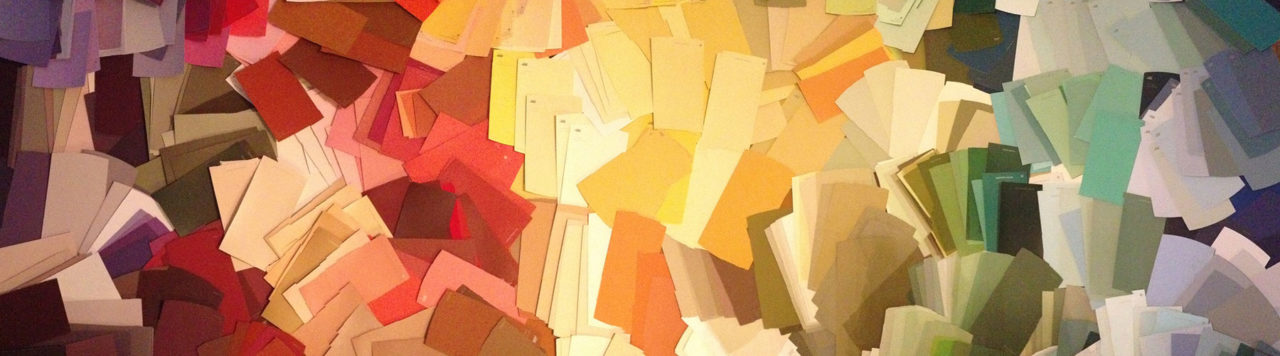

In [34]:
Scattered_colors = "C:\\Users\\12172\\Desktop\\Data Visulization\\Week 4\\Colors.png"

im = Image.open(Scattered_colors)
im

## Convert to an 8-color image for easier handling:

In [35]:
new_im, new_rgbs = convert_image(im, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[244.39608912 218.90740471 165.207778  ]
 [ 95.83617837  81.9039553   66.46405171]
 [236.5927065  148.358136    81.48641168]
 [149.81051287 123.31540359  88.29076624]
 [244.60686804 197.57559906 109.86687479]
 [183.77185381  63.00882119  41.95595236]
 [176.26095536 164.96001109 141.54144854]
 [ 79.11132236  36.80838928  34.4610144 ]]


## Checking the unique colors in the image to cross check if the conversion is working correctly

In [36]:
new_im_data = np.array(new_im)
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[ 79,  37,  34],
       [ 96,  82,  66],
       [150, 123,  88],
       [176, 165, 142],
       [184,  63,  42],
       [237, 148,  81],
       [244, 219, 165],
       [245, 198, 110]], dtype=uint8)

## Plotting all eight of the colors after image manipulation:

In [37]:
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[ 79,  37,  34],
       [ 96,  82,  66],
       [150, 123,  88],
       [176, 165, 142],
       [184,  63,  42],
       [237, 148,  81],
       [244, 219, 165],
       [245, 198, 110]], dtype=uint8)

In [38]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = new_im_data[:,:,0] == rgba[0]
    greens_mask = new_im_data[:,:,1] == rgba[1]
    blues_mask = new_im_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask 
    
    # grab number of pixels
    this_color_pixels = new_im_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )
    
colors # again, these have to be re-scaled to 0-1

[array([0.30980392, 0.14509804, 0.13333333]),
 array([0.37647059, 0.32156863, 0.25882353]),
 array([0.58823529, 0.48235294, 0.34509804]),
 array([0.69019608, 0.64705882, 0.55686275]),
 array([0.72156863, 0.24705882, 0.16470588]),
 array([0.92941176, 0.58039216, 0.31764706]),
 array([0.95686275, 0.85882353, 0.64705882]),
 array([0.96078431, 0.77647059, 0.43137255])]

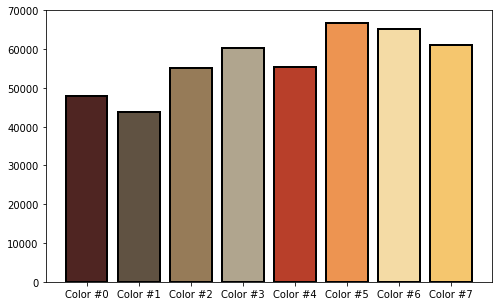

In [39]:
fig, ax = plt.subplots(figsize=(8,5))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

# Image 2: 

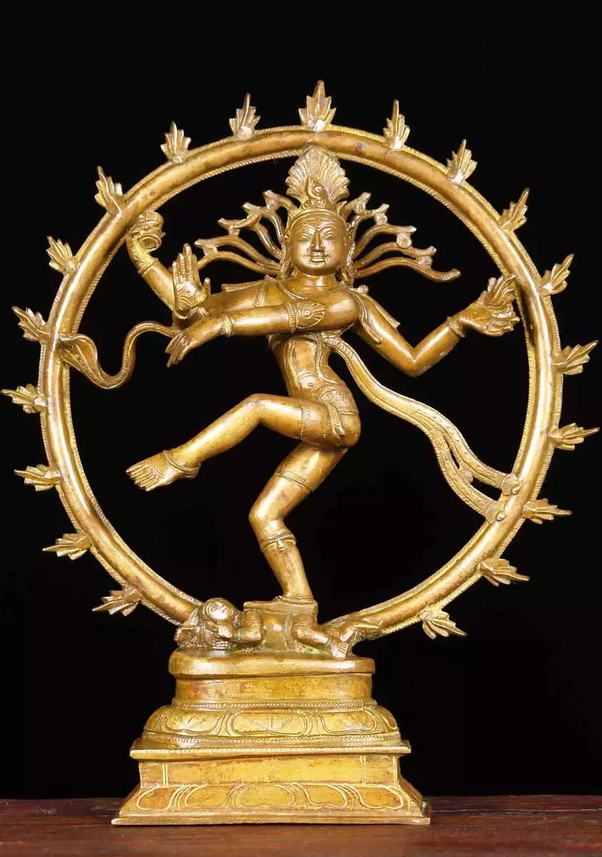

In [40]:
Dance = "C:\\Users\\12172\\Desktop\\Data Visulization\\Week 4\\Natraj.png"
im = Image.open(Dance)
im

In [41]:
new_im, new_rgbs = convert_image(im, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[206.59655836 165.68967967  94.06729756]
 [138.88003116  93.73028651  41.07536282]
 [248.33195374 229.57670938 189.83892732]
 [230.69450459 196.77873099 130.17999178]
 [176.00344745 132.85579518  64.07215586]
 [ 90.11774716  51.67673528  29.41551854]
 [  9.53126201   7.00101778   7.08566699]
 [  6.68234995   2.11850111   4.10637028]]


In [42]:
new_im_data = np.array(new_im)
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[  7,   2,   4],
       [ 10,   7,   7],
       [ 90,  52,  29],
       [139,  94,  41],
       [176, 133,  64],
       [207, 166,  94],
       [231, 197, 130],
       [248, 230, 190]], dtype=uint8)

In [43]:
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[  7,   2,   4],
       [ 10,   7,   7],
       [ 90,  52,  29],
       [139,  94,  41],
       [176, 133,  64],
       [207, 166,  94],
       [231, 197, 130],
       [248, 230, 190]], dtype=uint8)

In [44]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = new_im_data[:,:,0] == rgba[0]
    greens_mask = new_im_data[:,:,1] == rgba[1]
    blues_mask = new_im_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask 
    
    # grab number of pixels
    this_color_pixels = new_im_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )
    
colors # again, these have to be re-scaled to 0-1

[array([0.02745098, 0.00784314, 0.01568627]),
 array([0.03921569, 0.02745098, 0.02745098]),
 array([0.35294118, 0.20392157, 0.11372549]),
 array([0.54509804, 0.36862745, 0.16078431]),
 array([0.69019608, 0.52156863, 0.25098039]),
 array([0.81176471, 0.65098039, 0.36862745]),
 array([0.90588235, 0.77254902, 0.50980392]),
 array([0.97254902, 0.90196078, 0.74509804])]

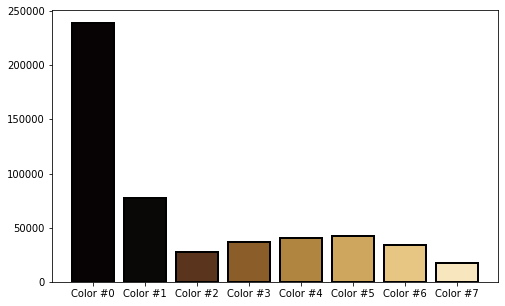

In [45]:
fig, ax = plt.subplots(figsize=(8,5))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

## Image 3:

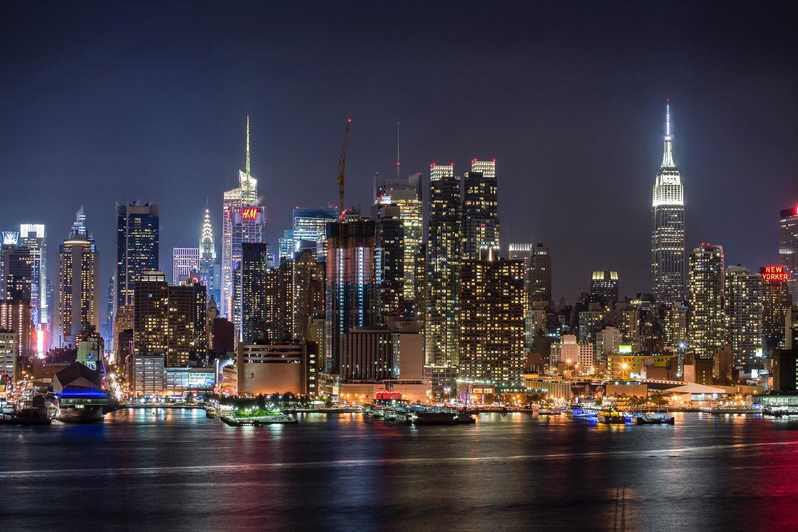

In [56]:
Mumbai_skyline = "C:\\Users\\12172\\Desktop\\Data Visulization\\Week 4\\city.jpg"

im = Image.open(Mumbai_skyline)
im

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[100.4228053   80.56539971  68.60149583]
 [ 64.48405615  70.50803278  97.21585054]
 [203.75309284 191.55885073 184.2591051 ]
 [141.29219989 123.75483239 116.20570682]
 [ 31.86976912  32.0541815   49.57263815]
 [ 51.88239881  51.28141372  67.97888161]
 [ 64.361929    41.85823702  35.31276371]
 [ 27.54646317  20.58015227  22.66525416]]


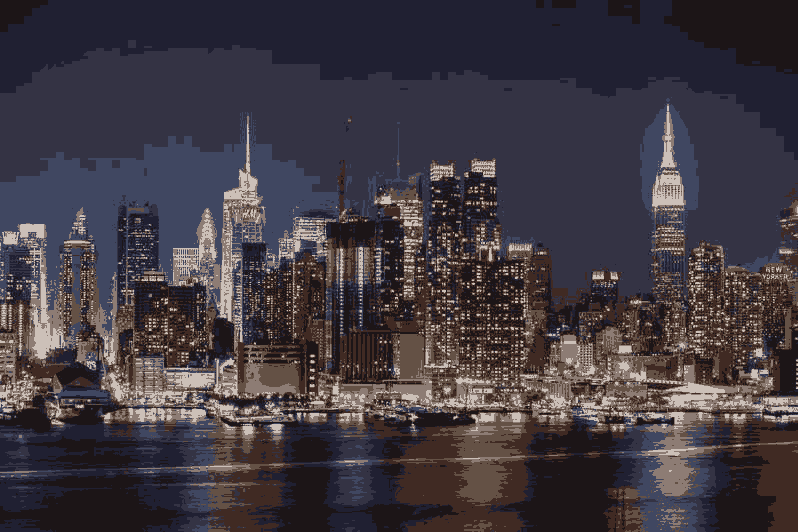

In [60]:
new_im, new_rgbs = convert_image(im, ncolors = 8)
new_im

In [61]:
#### Checking the unique colors in the image to cross check if the conversion is working correctly

new_im_data = np.array(new_im)
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

#### Plotting all eight of the colors after image manipulation:

np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)


## Plotting the image
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = new_im_data[:,:,0] == rgba[0]
    greens_mask = new_im_data[:,:,1] == rgba[1]
    blues_mask = new_im_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask 
    
    # grab number of pixels
    this_color_pixels = new_im_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )
    
colors # again, these have to be re-scaled to 0-1

[array([0.10980392, 0.08235294, 0.09019608]),
 array([0.1254902 , 0.1254902 , 0.19607843]),
 array([0.20392157, 0.2       , 0.26666667]),
 array([0.25098039, 0.16470588, 0.1372549 ]),
 array([0.25098039, 0.27843137, 0.38039216]),
 array([0.39215686, 0.31764706, 0.27058824]),
 array([0.55294118, 0.48627451, 0.45490196]),
 array([0.8       , 0.75294118, 0.72156863])]

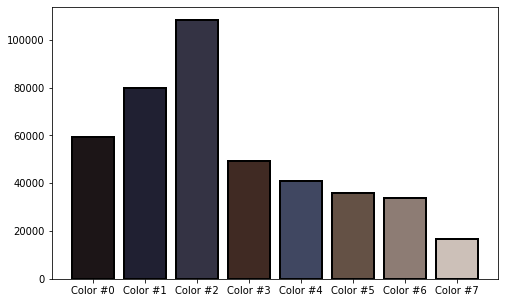

In [62]:
fig, ax = plt.subplots(figsize=(8,5))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

#  Write-ups:

Option #2: In class we made some histograms of the different RGB colors present in the image of Stitch.  Pick 3 of your own images (from the web, from your own photos) and create a visualization that shows how similar/different these images are using these histogramming methods presented in class.

The attached notebook & example image are an example of how to downsample your image into its most frequent colors or a user-selected set of colors.  While you do not have to necessarily use this for your visualization, you should nevertheless take some time to look over the code and answer the following prompt in a few sentences (3-5 sentences is fine): 

Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?


##  Takeways:



1. The assignment was about plotting the histogram of the colors involved in three different images of our choice
2. Steps followed to plot the histogram are as follows:\
    a. *Downsize the color profile of the selected image to restrict the number of colors to plotted.* \
    b. *Plot all the selected color used in image manipulation stage.*
    
    
3. **In Image1: Scatter Color Image:** In this image analysis, we can find that there are more than 8 colors within the image but we are considering only 8 out of "n" number of colors. The main disadvantage of downsizing the image is we tend to lose the parts of the information which might be important. For example, the **PURPLE** color is visible in the image which is removed in the downsizing process. Thus, modifying the visualization. 


4. **Image2: Dance:** In this image Black color is dominant and seems to cover the major part of the image distributed. After downsizing, however, the histogram portrays the different measurements of color distribution which shows that the Purple color is more dominant than Black. 


5. **Image3: New York City:** In this image, the number of pixels is more than 8 which complies with the default **ncolor** parameter of 8 most found colors.having said that this code is not feasible for all type of images providing the error fx and np variables are not of the same length. Thus, we are restricted to choose the image with 8 or more colors. 


### Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?

*The following are the issues in re-mapping of the image coloring:*

##### The re-mapping is limited to a list of RGB triplets. We can use the different color sequence such as hex coded,color names,etc.

1. In all Images, the pixel contains some amount of noise proportions. For instance, the big pixels contains more "good" data as comapred to small pixels. By downzising, the image filtering process is not clear. We are not able to discern which pixels are getting filtered out and which are adultered with noise values. 


2. Downsizing of the image color leads to loss of a pixel information as in the image2 the color black is reduced.Moreover,here the data is limited to an accountable number of colors so its clearly visible unlike the more complex set of images.Ultimately impacts the histogram values of the plotting leading to a decrease in data integrity.


4. The information leakage could be anaother cause of downsizing the image.This may cause due to inconsistency of the color gradients of the image.


5. Lastly, the algorithm is quite long to process. Having said that, after conversion, the images could have been plotted directly with the need to individually masking each color channel separately.


6. Advantage: Downsizing increases the response time leading to faster post-process. Additionally,the smaller files are easy to handle for memory-efficient data-processing.

